In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

# Readin Track File

In [3]:
tf0=pd.read_csv('tf_000000000000.csv')
tf1=pd.read_csv('tf_000000000001.csv')

In [4]:
track_data=tf0.append(tf1,ignore_index = True)
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,6.533861e-01,0,0.769258,-17.094,0.199170,major,0.759699,0.033940,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,3.941550e-09,0,0.085844,-11.295,0.357639,major,0.747436,0.049856,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,1.041595e-01,0,0.407325,-9.310,0.304721,major,0.493154,0.071753,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,1.444963e-05,0,0.251502,-12.159,0.702948,major,0.212197,0.029425,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,5.266880e-01,0,0.218370,-13.813,0.888889,major,0.193438,0.032178,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870


In [5]:
session_data=pd.read_csv('log_mini.csv')
session_data.head(2)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [6]:
session_data=session_data.rename(columns={'track_id_clean':'track_id'})
session_data.head(2)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


# Merging Files

In [7]:
final_df=pd.merge(session_data,track_data,on='track_id',how='left')
final_df.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [8]:
# final_df.drop('track_id',axis=1,inplace=True)
# final_df.head(2)

### Creating skipped column by adding skip_1,skip_2 and skip_3

In [9]:
final_df['skipped']=final_df['skip_1']+final_df['skip_2']+final_df['skip_3']
final_df.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False


In [10]:
final_df.head(20)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,20,t_c815228b-3212-4f9e-9d4f-9cb19b248184,False,False,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,fwdbtn,216.689484,2018,99.997602,0.098337,0.548632,0.658323,0.596480,10.416269,0.557129,1.027320,7.479557e-08,1,0.056493,-7.522,0.385027,minor,0.440376,0.133586,133.246994,5,0.661081,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233,True
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,20,t_e23c19f5-4c32-4557-aa44-81372c2e3705,True,True,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,186.453323,2018,99.861567,0.449629,0.487708,0.608612,0.557520,9.834414,0.469350,1.033029,2.062497e-08,6,0.111306,-7.808,0.157576,major,0.675220,0.409848,104.466003,4,0.109420,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836,True
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,20,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,True,True,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,214.047348,2018,

# EDA

In [11]:
final_df.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

In [12]:
# sns.countplot(final_df.dtypes,palette='pastel')
# plt.show()

In [13]:
final_df.drop(['skip_1','skip_2','skip_3'],axis=1,inplace=True)
final_df.head(2)

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False


In [14]:
final_df.shape

(167880, 48)

In [15]:
final_df.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084,215.893484,2013.368614,99.744583,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243,60.223626,9.740043,0.892779,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,183.503403,2015.000000,99.913831,0.030579,0.434064,0.451872,0.562350,7.224558,0.513711,0.989104,3.701751e-09,1.000000,0.099943,-8.232000,0.452991,0.205129,0.044635,97.004997,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,212.027023,2017.000000,99.988785,0.115362,0.550788,0.594088,0.687427,8.965730,0.630788,1.013991,5.221813e-07,5.000000,0.125049,-6.506000,0.639286,0.305746,0.086432,123.935997,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,240.800003,2018.000000,99.998715,0.336899,0.665993,0.724430,0.786602,10.764786,0.760826,1.033737,9.802441e-05,8.000000,0.235885,-5.083000,0.757812,0.470098,0.206128,144.072998,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [16]:
for f in final_df.columns:
    print(f'Feature {f} has {len(final_df[f].unique())} values')

Feature session_id has 10000 values
Feature session_position has 20 values
Feature session_length has 11 values
Feature track_id has 50704 values
Feature not_skipped has 2 values
Feature context_switch has 2 values
Feature no_pause_before_play has 2 values
Feature short_pause_before_play has 2 values
Feature long_pause_before_play has 2 values
Feature hist_user_behavior_n_seekfwd has 25 values
Feature hist_user_behavior_n_seekback has 30 values
Feature hist_user_behavior_is_shuffle has 2 values
Feature hour_of_day has 24 values
Feature date has 18 values
Feature premium has 2 values
Feature context_type has 6 values
Feature hist_user_behavior_reason_start has 9 values
Feature hist_user_behavior_reason_end has 7 values
Feature duration has 33549 values
Feature release_year has 69 values
Feature us_popularity_estimate has 50704 values
Feature acousticness has 50673 values
Feature beat_strength has 50548 values
Feature bounciness has 50589 values
Feature danceability has 50580 values
Feat

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


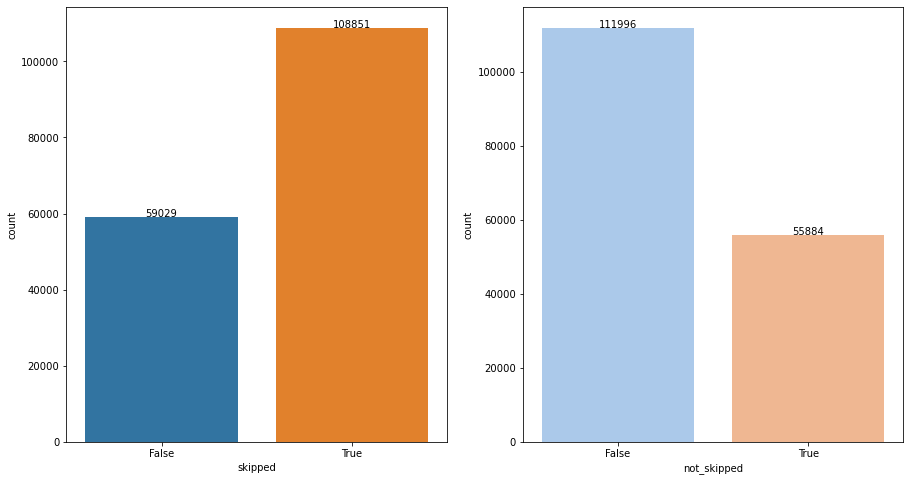

In [17]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
g=sns.countplot(final_df['skipped'],ax=ax[0])
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

g1=sns.countplot(final_df['not_skipped'],ax=ax[1],palette='pastel')
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


We can see total number of skipped are 108851

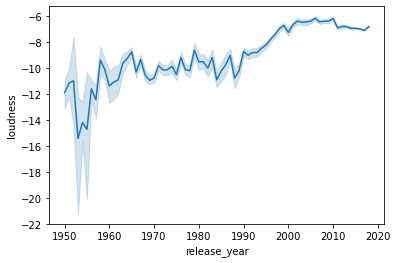

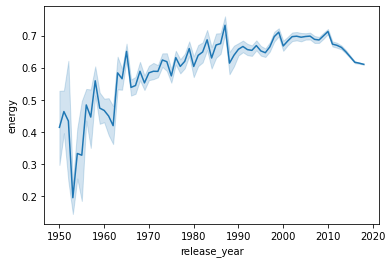

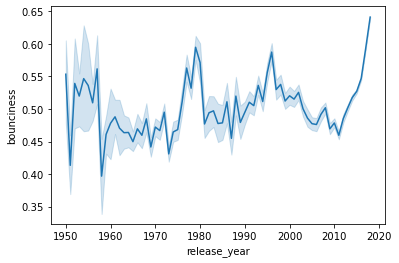

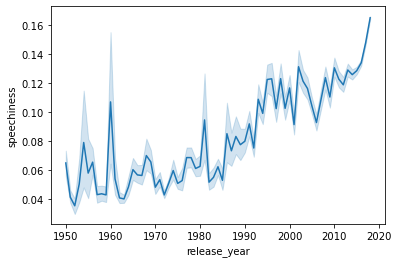

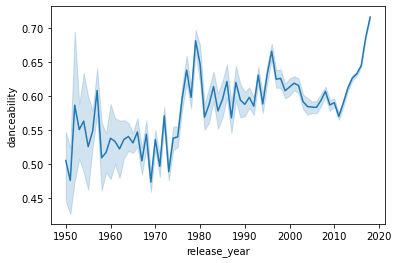

In [18]:
sns.lineplot(x='release_year',y='loudness',data=final_df)
plt.show()
sns.lineplot(x='release_year',y='energy',data=final_df)
plt.show()
sns.lineplot(x='release_year',y='bounciness',data=final_df)
plt.show()
sns.lineplot(x='release_year',y='speechiness',data=final_df)
plt.show()
sns.lineplot(x='release_year',y='danceability',data=final_df)
plt.show()

For loudness we can say that it has random distribution sometimes it increases and sometimes decreases.
For energy we can say first it decreases in the initial years then it peaked in 1985 after that it slightly decreases. 
For bounciness we can say it has random distribution but since 2012 it is continuously increases.
For speechiness and danceability both have random distribution but both increased after 2010.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


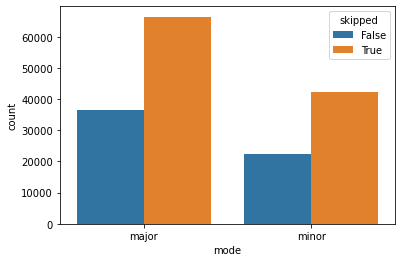

In [19]:
sns.countplot(final_df['mode'],hue=final_df['skipped'])
plt.show()

Major category has the large numbers of skipped as compared to the minor.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='premium', ylabel='count'>

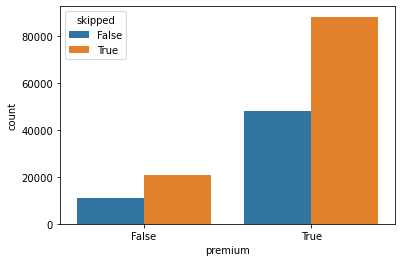

In [20]:
sns.countplot(final_df['premium'],hue=final_df['skipped'])

We can see person who has the premium account, has skipped large number of songs as compared to those who have not.

#### Extracting numeric features names

In [21]:
numeric_feature=[f for f in final_df.columns if final_df[f].dtypes!='O' and final_df[f].dtypes!='bool']
numeric_feature

['session_position',
 'session_length',
 'context_switch',
 'no_pause_before_play',
 'short_pause_before_play',
 'long_pause_before_play',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hour_of_day',
 'duration',
 'release_year',
 'us_popularity_estimate',
 'acousticness',
 'beat_strength',
 'bounciness',
 'danceability',
 'dyn_range_mean',
 'energy',
 'flatness',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mechanism',
 'organism',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'acoustic_vector_0',
 'acoustic_vector_1',
 'acoustic_vector_2',
 'acoustic_vector_3',
 'acoustic_vector_4',
 'acoustic_vector_5',
 'acoustic_vector_6',
 'acoustic_vector_7']

In [22]:
discrete_feature=[f for f in numeric_feature if len(final_df[f].unique())<20]
discrete_feature

['session_length',
 'context_switch',
 'no_pause_before_play',
 'short_pause_before_play',
 'long_pause_before_play',
 'key',
 'time_signature']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


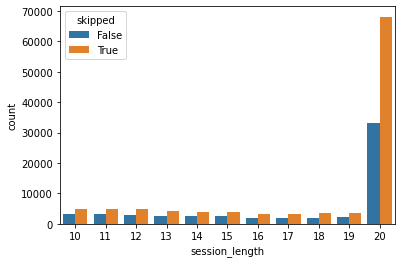

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


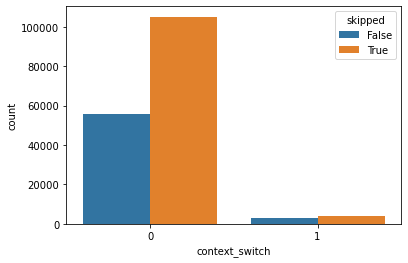

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


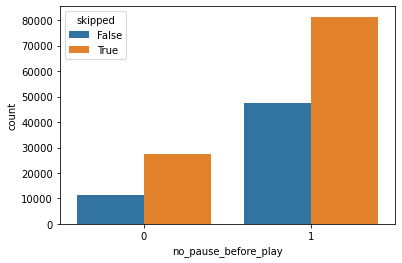

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


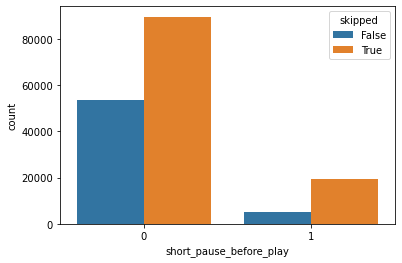

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


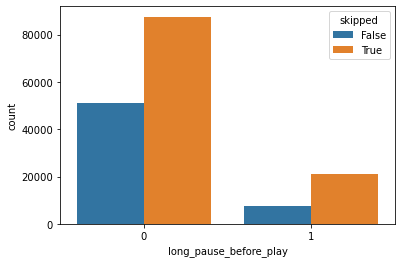

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


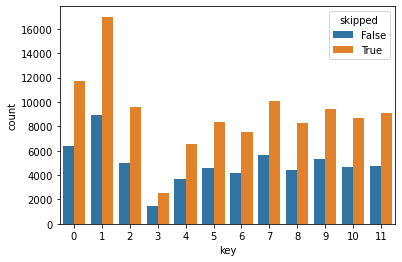

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


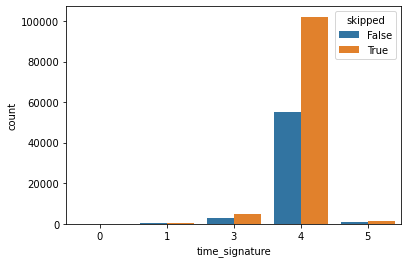

In [23]:
for f in discrete_feature:
    sns.countplot(final_df[f],hue=final_df['skipped'])
    plt.show()

For context_Swith: Those who have not switched the context most of the times they have skipped.
For short_pause_before_play: If there is not short pause before delay there is high chance that user is going to skip same goes for long_pause_before_play

In [24]:
continuous_feature=[f for f in numeric_feature if f not in discrete_feature]
continuous_feature

['session_position',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hour_of_day',
 'duration',
 'release_year',
 'us_popularity_estimate',
 'acousticness',
 'beat_strength',
 'bounciness',
 'danceability',
 'dyn_range_mean',
 'energy',
 'flatness',
 'instrumentalness',
 'liveness',
 'loudness',
 'mechanism',
 'organism',
 'speechiness',
 'tempo',
 'valence',
 'acoustic_vector_0',
 'acoustic_vector_1',
 'acoustic_vector_2',
 'acoustic_vector_3',
 'acoustic_vector_4',
 'acoustic_vector_5',
 'acoustic_vector_6',
 'acoustic_vector_7']

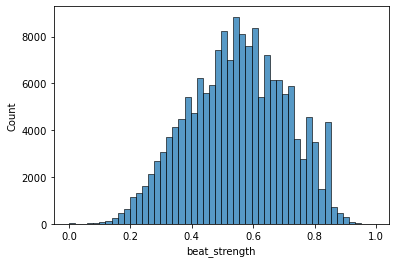

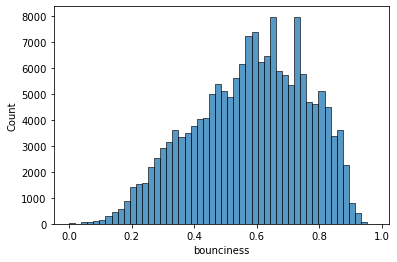

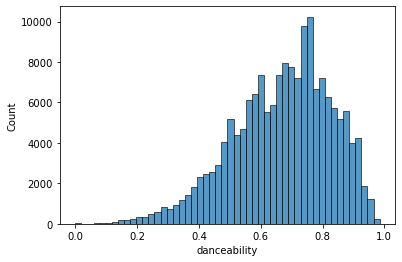

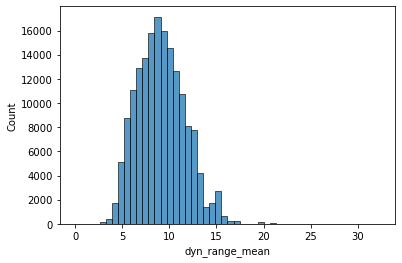

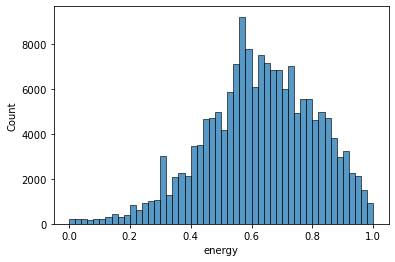

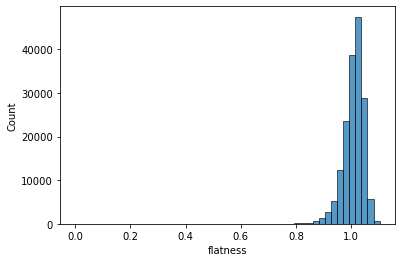

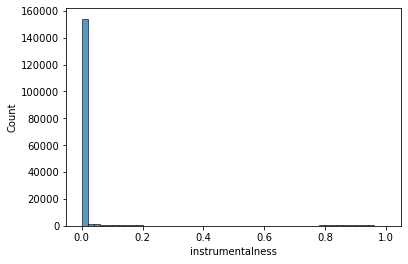

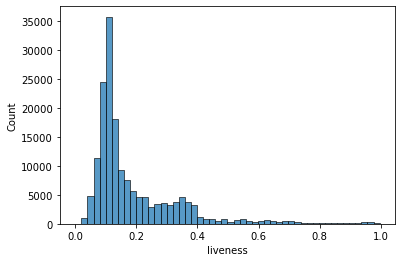

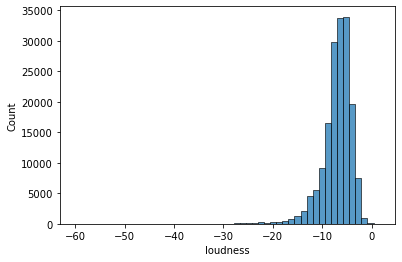

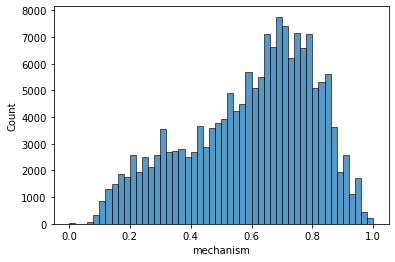

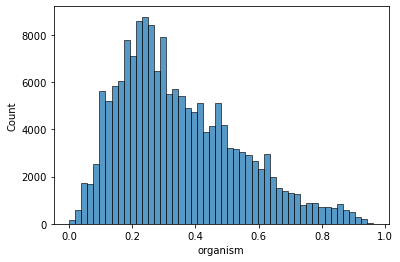

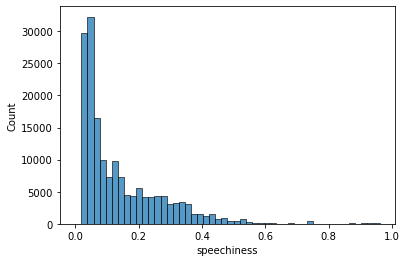

In [25]:
col_to_visualize=['beat_strength',
 'bounciness',
 'danceability',
 'dyn_range_mean',
 'energy',
 'flatness',
 'instrumentalness',
 'liveness',
 'loudness',
 'mechanism',
 'organism',
 'speechiness']
for col in col_to_visualize:
    sns.histplot(final_df[col],bins=50)
    plt.show()


We can see some of the features are not normally distributed (like speechiness etc) and some of them are normally distributed (like loudness etc)

In [26]:
categorical_feature=[f for f in final_df.columns if final_df[f].dtypes=='O']
categorical_feature

['session_id',
 'track_id',
 'date',
 'context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end',
 'mode']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


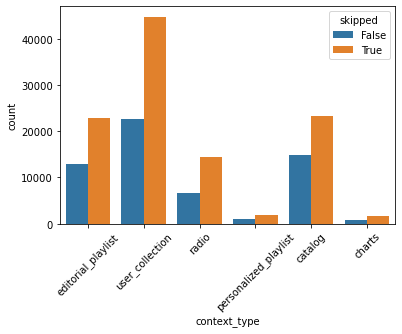

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


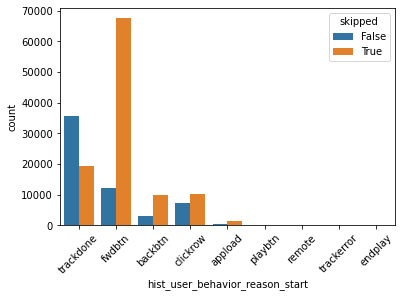

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


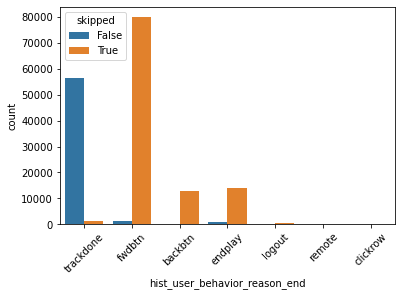

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


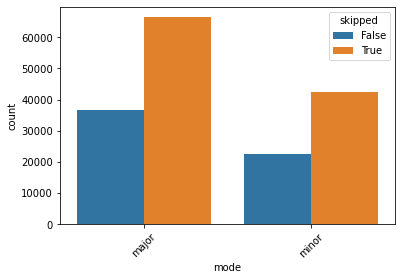

In [27]:
col_to_visualize=['context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end',
 'mode']
for col in col_to_visualize:
    sns.countplot(final_df[col],hue=final_df['skipped'])
    plt.xticks(rotation=45)
    plt.show()

In [28]:
bool_feature=[f for f in final_df.columns if final_df[f].dtypes=='bool']
bool_feature

['not_skipped', 'hist_user_behavior_is_shuffle', 'premium', 'skipped']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


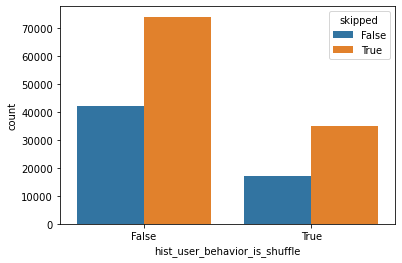

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


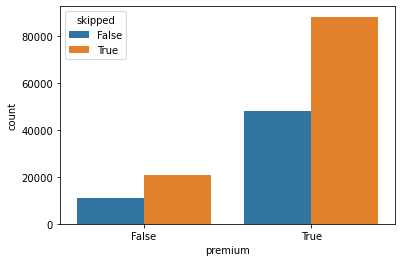

In [29]:
col_to_visualize=['hist_user_behavior_is_shuffle', 'premium']
for col in col_to_visualize:
    sns.countplot(final_df[col],hue=final_df['skipped'])
    plt.show()

##### Splitting the date column 

In [30]:
final_df[['year','month','day']]=final_df['date'].str.split('-',expand=True)
final_df.head(2)

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False,2018,07,15
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False,2018,07,15


In [31]:
final_df.drop('date',axis=1,inplace=True)
final_df['year']=final_df['year'].astype('int64')
final_df['month']=final_df['month'].astype('int64')
final_df['day']=final_df['day'].astype('int64')
final_df.head(2)

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,0,0,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False,2018,7,15
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False,2018,7,15


###### Computing age of the song

In [32]:
final_df['song_age']=final_df['year']-final_df['release_year']
final_df.head(2)

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day,song_age
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,0,0,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False,2018,7,15,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False,2018,7,15,0


In [33]:
categorical_feature=[f for f in final_df.columns if final_df[f].dtypes=='O']
for f in categorical_feature:
    print(f'Feature {f} has {len(final_df[f].unique())} values')

Feature session_id has 10000 values
Feature track_id has 50704 values
Feature context_type has 6 values
Feature hist_user_behavior_reason_start has 9 values
Feature hist_user_behavior_reason_end has 7 values
Feature mode has 2 values


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='song_age', ylabel='count'>

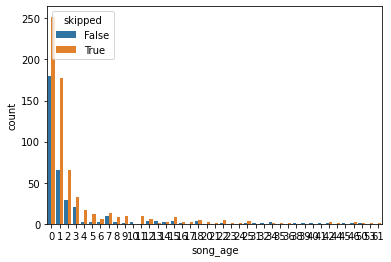

In [34]:
sns.countplot(final_df['song_age'][:1000],hue=final_df['skipped'][:1000])

# Feature Engineering

##### Handling Missing Values

In [35]:
final_df.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
danceability                       0
dyn_range_mean                     0
energy                             0
flatness                           0
i

No any null values to handle

##### Looking for imbalanced Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


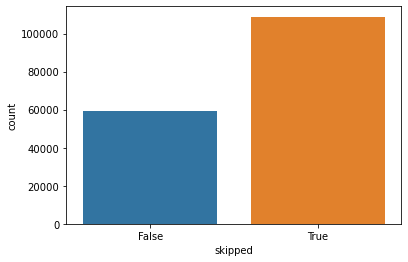

In [36]:
sns.countplot(final_df['skipped'])
plt.show()

In [37]:
val=final_df['skipped'].value_counts()
val

True     108851
False     59029
Name: skipped, dtype: int64

In [38]:
false=59029
true=108851
false_percent=(false/final_df.shape[0])*100
true_percent=(true/final_df.shape[0])*100
print(f'False= {false_percent} %')
print(f'True= {true_percent} %')

False= 35.16142482725756 %
True= 64.83857517274242 %


##### Removing Outliers

In [39]:
def remove_outlier(dataset,col):
    q1=dataset[col].quantile(0.25)
    q3=dataset[col].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q3+(1.5*IQR)
    l1=dataset[(dataset[col]<lower_limit)].values
    o1=dataset[(dataset[col]>upper_limit)].values
    dataset[col]=dataset[col].replace(l1,lower_limit)
    dataset[col]=dataset[col].replace(o1,upper_limit)
    return dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


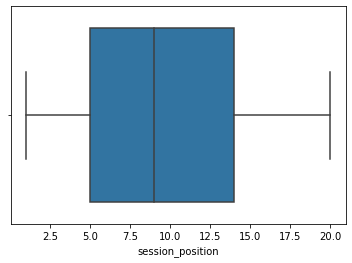

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


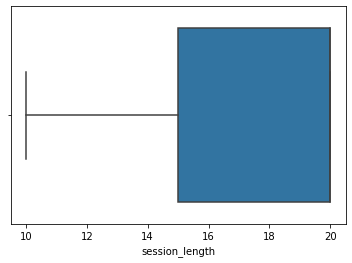

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


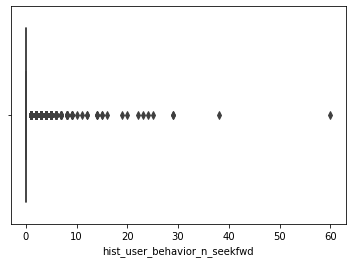

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


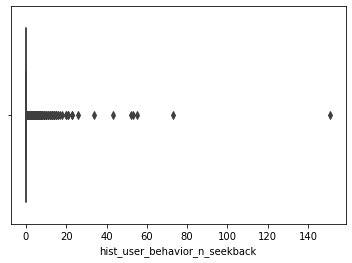

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


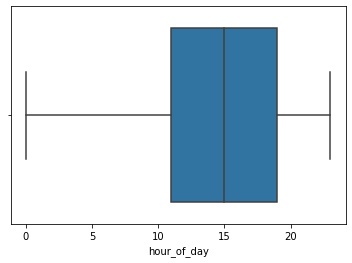

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


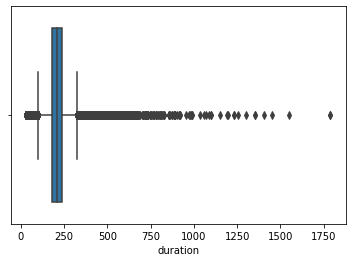

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


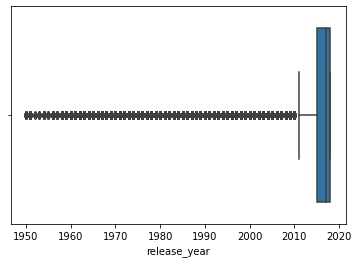

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


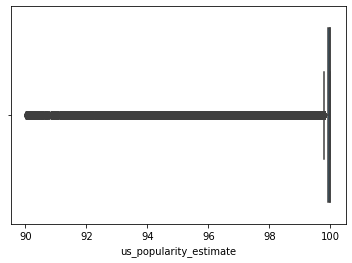

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


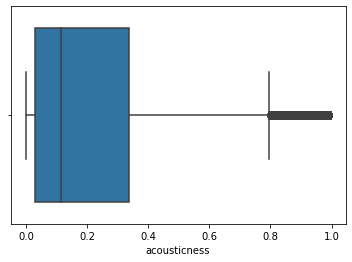

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


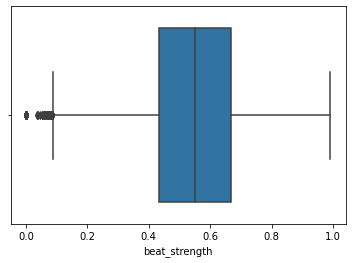

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


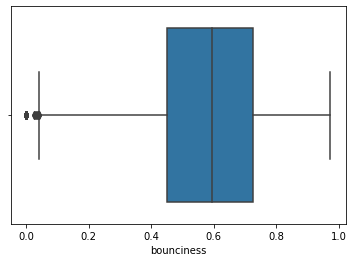

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


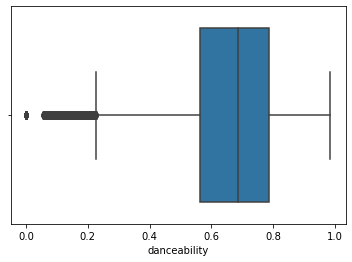

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


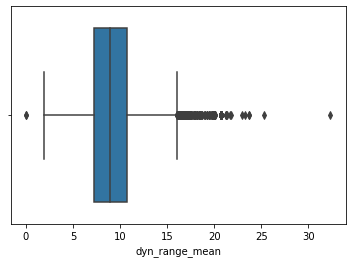

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


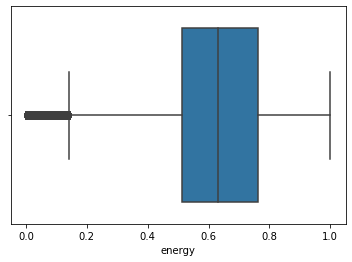

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


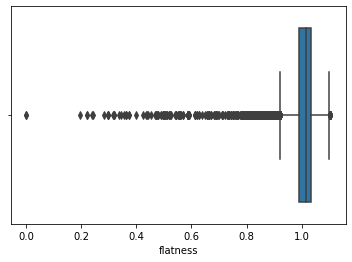

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


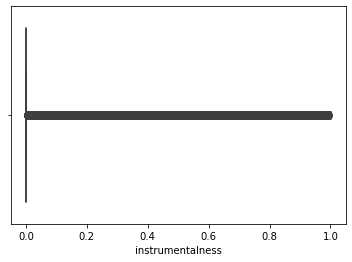

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


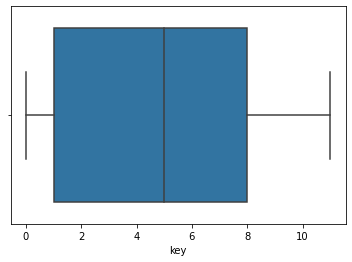

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


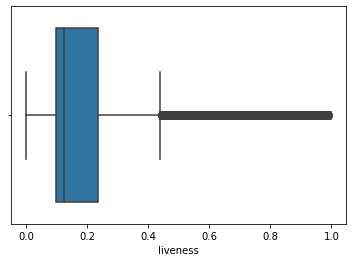

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


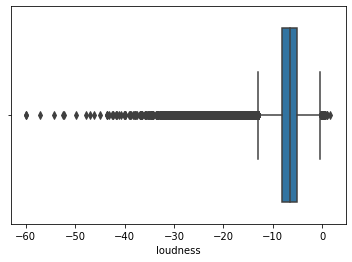

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


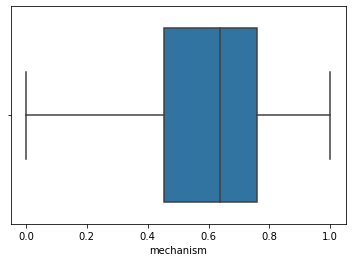

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


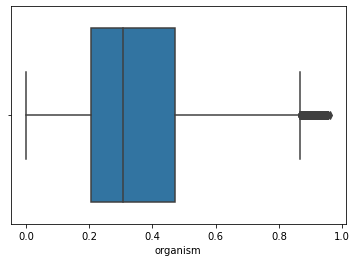

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


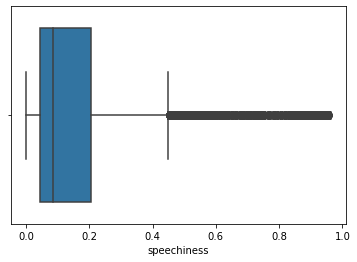

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


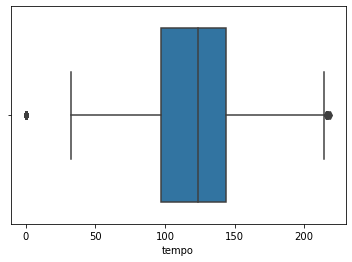

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


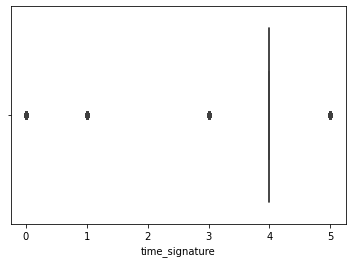

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


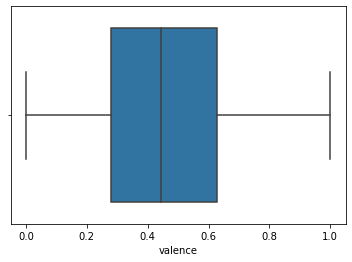

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


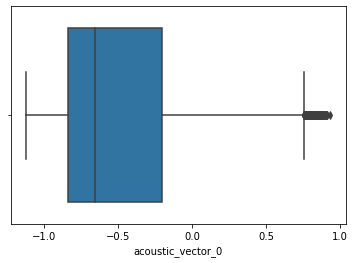

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


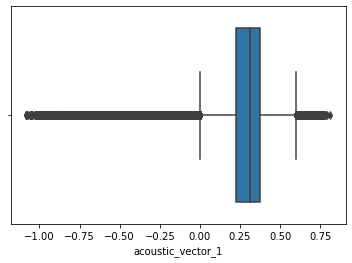

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


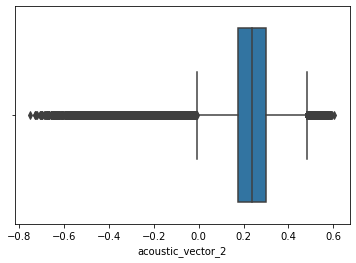

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


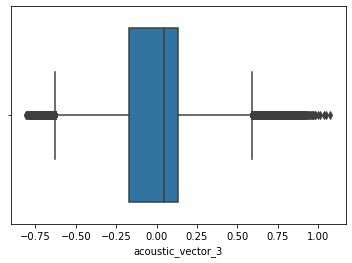

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


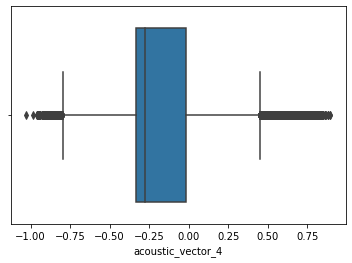

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


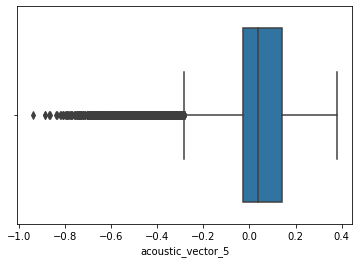

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


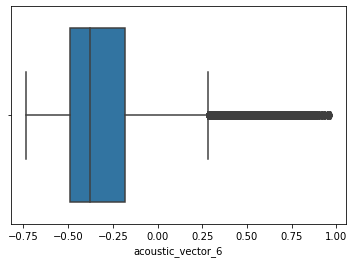

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


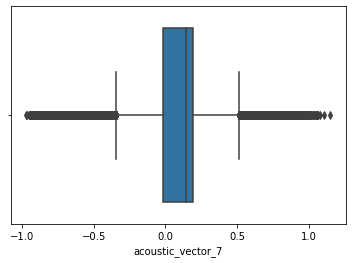

In [40]:
outliers_removal_cols=[f for f in numeric_feature if len(final_df[f].unique())>2]
for col in outliers_removal_cols:
    sns.boxplot(final_df[col])
    plt.show()


In [41]:
outliers_removal_col=['hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback','duration','release_year','acousticness',
                        'beat_strength','bounciness','danceability','dyn_range_mean','energy','flatness','liveness',
                       'loudness','organism','speechiness','tempo','acoustic_vector_0','acoustic_vector_1',
                       'acoustic_vector_2','acoustic_vector_3','acoustic_vector_4','acoustic_vector_5','acoustic_vector_6','acoustic_vector_7']
for col in outliers_removal_col:
    final_df=remove_outlier(final_df.copy(),col)
    

In [42]:
final_df.head()

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day,song_age
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,0,0,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False,2018,7,15,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False,2018,7,15,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False,2018,7,15,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False,2018,7,15,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False,2018,7,15,0


In [43]:
# final_df['hist_user_behavior_reason_start']=final_df['hist_user_behavior_reason_start']+'_start'
# final_df['hist_user_behavior_reason_end']=final_df['hist_user_behavior_reason_end']+'_end'

In [44]:
final_df

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day,song_age
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,0,0,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False,2018,7,15,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False,2018,7,15,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False,2018,7,15,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False,2018,7,15,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False,2018,7,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,True,0,1,0,0,0,0,False,13,True,user_collection,trackdone,trackdone,241.306671,2018,99.926393,0.100227,0.559790,0.571664,0.565336,8.411594,0.875369,0.981698,3.246980e-04,2,0.244097,-5.905,0.430147,minor,0.409132,0.045821,155.546005,4,0.891322,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040,False,2018,7,15,0
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,True,0,1,0,0,0,0,False,13,True,user_collection,trackdone,trackdone,212.533325,2018,99.905106,0.247189,0.601121,0.632665,0.703095,9.269985,0.529001,1.025182,6.178943e-08,1,0.322316,-7.339,0.438776,minor,0.433633,0.036520,134.427002,4,0.701824,-0.472023,-0.011628,0.234998,0.169529,0.321254,0.105851,-0.215453,-0.013233,False,2018,7,15,0
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f2

##### Labeling data / encoding

In [45]:
bool_feature

['not_skipped', 'hist_user_behavior_is_shuffle', 'premium', 'skipped']

In [46]:
categorical_feature

['session_id',
 'track_id',
 'context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end',
 'mode']

In [49]:
label_col=bool_feature+['mode']
label_col


['not_skipped', 'hist_user_behavior_is_shuffle', 'premium', 'skipped', 'mode']

In [50]:
from sklearn.preprocessing import LabelEncoder
import joblib
le=LabelEncoder()

final_df['skipped']=le.fit_transform(final_df['skipped'])
final_df['hist_user_behavior_is_shuffle']=le.transform(final_df['hist_user_behavior_is_shuffle'])
final_df['not_skipped']=le.transform(final_df['not_skipped'])
final_df['premium']=le.transform(final_df['premium'])


final_df.head()

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day,song_age
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,1,0,0,0,0,0,0,1,16,1,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,2018,7,15,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,1,0,1,0,0,0,0,1,16,1,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0,2018,7,15,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,1,0,1,0,0,0,0,1,16,1,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0,2018,7,15,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,1,0,1,0,0,0,0,1,16,1,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0,2018,7,15,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,1,0,1,0,0,0,0,1,16,1,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0,2018,7,15,0


In [52]:
le=LabelEncoder()
final_df['hist_user_behavior_reason_end']=le.fit_transform(final_df['hist_user_behavior_reason_end'])



ValueError: y contains previously unseen labels: 'appload'

In [53]:
joblib.dump(le,"labelencoder_reasonend.sav")

['labelencoder_reasonend.sav']

In [55]:
le=LabelEncoder()
final_df['hist_user_behavior_reason_start']=le.fit_transform(final_df['hist_user_behavior_reason_start'])
joblib.dump(le,"labelencoder_reasonstart.sav")

['labelencoder_reasonstart.sav']

In [57]:
le=LabelEncoder()
final_df['context_type']=le.fit_transform(final_df['context_type'])
joblib.dump(le,"labelencoder_context.sav")

['labelencoder_context.sav']

In [58]:
final_df['mode']=np.where(final_df['mode']=='major',1,0)
final_df.head()

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day,song_age
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,1,0,0,0,0,0,0,1,16,1,2,7,6,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,2018,7,15,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,1,0,1,0,0,0,0,1,16,1,2,7,6,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,0,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0,2018,7,15,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,1,0,1,0,0,0,0,1,16,1,2,7,6,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,1,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0,2018,7,15,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,1,0,1,0,0,0,0,1,16,1,2,7,6,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,1,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0,2018,7,15,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,1,0,1,0,0,0,0,1,16,1,2,7,6,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,1,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0,2018,7,15,0


##### Scaling data

In [59]:
col_to_scale=['session_position','session_length','hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback','hour_of_day',
              'duration','release_year','us_popularity_estimate','acousticness','beat_strength','bounciness','danceability',
              'dyn_range_mean','energy','flatness','instrumentalness','key','liveness','loudness','mechanism','organism',
              'speechiness','tempo','time_signature','valence','year','month','year']
col_to_scale

['session_position',
 'session_length',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hour_of_day',
 'duration',
 'release_year',
 'us_popularity_estimate',
 'acousticness',
 'beat_strength',
 'bounciness',
 'danceability',
 'dyn_range_mean',
 'energy',
 'flatness',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mechanism',
 'organism',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'year',
 'month',
 'year']

In [60]:
from sklearn.preprocessing import StandardScaler
def scale(dataset,col):
    dataset[col]=dataset[col]/np.max(dataset[col])
    return dataset

In [62]:
ss=StandardScaler()
final_df['session_position']=ss.fit_transform(final_df[['session_position']])
for i in col_to_scale:
    if i!='session_position':
        final_df[i]=ss.transform(final_df[[i]])
final_df.head()

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day,song_age
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-1.525557,1.955813,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,1,0,0,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,31.284828,368.049354,16.608374,-1.705883,-1.628431,-1.622035,-1.589116,-0.305241,-1.607375,-1.519142,-1.708148,-1.525557,-1.584455,-2.913890,-1.608600,1,-1.650031,-1.696013,22.848613,-0.975867,-1.680889,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,65.728896,-0.426177,15,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-1.342327,1.955813,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,41.679412,368.049354,16.595291,-1.697461,-1.588807,-1.573992,-1.548022,0.363316,-1.575610,-1.520860,-1.708787,-0.426177,-1.689672,-2.683387,-1.557665,0,-1.684712,-1.697581,22.118075,-0.975867,-1.647010,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0,65.728896,-0.426177,15,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-1.159097,1.955813,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,40.666204,368.049354,16.614209,-1.643902,-1.611280,-1.609767,-1.584242,-0.230890,-1.605627,-1.520158,-1.708787,0.123513,-1.683909,-2.779400,-1.566907,1,-1.654382,-1.700476,24.864694,-0.975867,-1.640284,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0,65.728896,-0.426177,15,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-0.975867,1.955813,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,29.408555,368.049354,16.613304,-1.567842,-1.591198,-1.575171,-1.550315,0.359438,-1.611769,-1.526744,-1.708786,-1.525557,-1.689782,-3.129919,-1.593169,1,-1.598249,-1.666656,18.809676,-0.975867,-1.589794,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0,65.728896,-0.426177,15,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-0.792637,1.955813,t_64f3743c-f624-46bb-a579-0f3f9a07a123,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,36.869421,368.049354,16.613938,-1.707577,-1.574584,-1.563141,-1.551616,0.523245,-1.589677,-1.525452,-1.708786,-0.242947,-1.686645,-2.610095,-1.569630,1,-1.677611,-1.664632,25.231704,-0.975867,-1.589152,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0,65.728896,-0.426177,15,0


In [84]:
final_df.iloc[33101,:]

session_id                         0_02e5ba11-e320-416c-8ff9-e5c2f2785674
session_position                                                 0.856433
session_length                                                   1.039663
track_id                           t_1f6009ef-3bfa-4b6c-b3e8-9763e3a08815
not_skipped                                                             1
context_switch                                                          0
no_pause_before_play                                                    1
short_pause_before_play                                                 0
long_pause_before_play                                                  0
hist_user_behavior_n_seekfwd                                    -1.708787
hist_user_behavior_n_seekback                                   -1.708787
hist_user_behavior_is_shuffle                                           0
hour_of_day                                                     -0.975867
premium                               

In [63]:
joblib.dump(ss,"scaler.sav")

['scaler.sav']

In [ ]:
#final_df.to_csv('final.csv',index=False);

##### Feature Selection

In [ ]:

X=final_df.drop(['session_id','skipped'],axis=1)
y=final_df['skipped']



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)


In [ ]:
imp=pd.Series(model.feature_importances_,index=X.columns)
imp.nlargest(20).plot(kind='barh')
plt.show()

In [85]:
final_df

,session_id,session_position,session_length,track_id,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day,song_age
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-1.525557,1.955813,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,1,0,0,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,31.284828,368.049354,16.608374,-1.705883,-1.628431,-1.622035,-1.589116,-0.305241,-1.607375,-1.519142,-1.708148,-1.525557,-1.584455,-2.913890,-1.608600,1,-1.650031,-1.696013,22.848613,-0.975867,-1.680889,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,65.728896,-0.426177,15,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-1.342327,1.955813,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,41.679412,368.049354,16.595291,-1.697461,-1.588807,-1.573992,-1.548022,0.363316,-1.575610,-1.520860,-1.708787,-0.426177,-1.689672,-2.683387,-1.557665,0,-1.684712,-1.697581,22.118075,-0.975867,-1.647010,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0,65.728896,-0.426177,15,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-1.159097,1.955813,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,40.666204,368.049354,16.614209,-1.643902,-1.611280,-1.609767,-1.584242,-0.230890,-1.605627,-1.520158,-1.708787,0.123513,-1.683909,-2.779400,-1.566907,1,-1.654382,-1.700476,24.864694,-0.975867,-1.640284,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0,65.728896,-0.426177,15,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-0.975867,1.955813,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,29.408555,368.049354,16.613304,-1.567842,-1.591198,-1.575171,-1.550315,0.359438,-1.611769,-1.526744,-1.708786,-1.525557,-1.689782,-3.129919,-1.593169,1,-1.598249,-1.666656,18.809676,-0.975867,-1.589794,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0,65.728896,-0.426177,15,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,-0.792637,1.955813,t_64f3743c-f624-46bb-a579-0f3f9a07a123,1,0,1,0,0,-1.708787,-1.708787,1,1.222893,1,2,7,6,36.869421,368.049354,16.613938,-1.707577,-1.574584,-1.563141,-1.551616,0.523245,-1.589677,-1.525452,-1.708786,-0.242947,-1.686645,-2.610095,-1.569630,1,-1.677611,-1.664632,25.231704,-0.975867,-1.589152,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0,65.728896,-0.426177,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,1.222893,1.955813,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,1,0,1,0,0,-1.708787,-1.708787,0,0.673203,1,5,7,6,42.505835,368.049354,16.600726,-1.690422,-1.606216,-1.604041,-1.605200,-0.167530,-1.548393,-1.528910,-1.708727,-1.342327,-1.664061,-2.790760,-1.629971,0,-1.633822,-1.700391,26.791908,-0.975867,-1.545470,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040,0,65.728896,-0.426177,15,0
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,1.406123,1.955813,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,1,0,1,0,0,-1.708787,-1.708787,0,0.673203,1,5,7,6,37.233694,368.049354,16.596826,-1.663494,-1.598643,-1.592863,-1.579959,-0.010247,-1.611858,-1.520943,-1.708787,-1.525557,-1.649729,-3.053512,-1.628390,0,-1.629332,-1.702095,22.922

In [86]:
final_df.to_csv('clean_dataframe.csv',index=False)

In [64]:
X=final_df[['session_length','session_position','context_type','context_switch','no_pause_before_play','hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback','hour_of_day','premium','hist_user_behavior_reason_start',
           'hist_user_behavior_reason_end','year','month','day']]
y=final_df['skipped']

# Modeling 

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier


In [67]:
from sklearn.metrics import f1_score,accuracy_score

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=3)

In [82]:
xtrain

,session_length,session_position,context_type,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,premium,hist_user_behavior_reason_start,hist_user_behavior_reason_end,year,month,day
122706,0.489973,-0.426177,0,0,1,-1.708787,-1.708787,1.589353,1,1,3,65.728896,-0.426177,15
120037,1.222893,0.123513,5,0,1,-1.708787,-1.708787,2.505503,1,4,3,65.728896,-0.426177,14
130371,1.955813,1.589353,2,0,1,-1.708787,-1.708787,-1.342327,1,4,3,65.728896,-0.426177,15
28822,0.856433,0.673203,5,0,1,-1.708787,-1.708787,1.039663,0,7,6,65.728896,-0.426177,15
62330,1.955813,-0.792637,2,0,1,-1.708787,-1.708787,1.772583,1,4,3,65.728896,-0.426177,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156437,1.772583,-0.975867,3,0,1,-1.708787,-1.708787,-0.059717,1,4,3,65.728896,-0.426177,15
104704,1.955813,1.039663,4,0,1,-1.708787,-1.708787,-0.059717,1,4,3,65.728896,-0.426177,15
48056,1.955813,-1.342327,4,0,1,-1.708787,-1.708787,1.406123,1,4,3,65.728896,-0.426177,15
77049,1.955813,1.039663,2,0,1,-1.708787,-1.708787,1.406123,1,4,3,65.728896,-0.426177,15


In [83]:
xtest

,session_length,session_position,context_type,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,premium,hist_user_behavior_reason_start,hist_user_behavior_reason_end,year,month,day
33101,1.039663,0.856433,3,0,1,-1.708787,-1.708787,-0.975867,1,7,6,65.728896,-0.426177,15
145354,1.955813,0.856433,0,0,1,-1.708787,-1.708787,1.772583,1,4,3,65.728896,-0.426177,14
163224,1.955813,-0.609407,5,0,1,-1.708787,-1.708787,1.589353,1,4,3,65.728896,-0.426177,15
107777,1.039663,-0.975867,5,0,1,-1.708787,-1.708787,0.856433,1,7,6,65.728896,-0.426177,15
78627,1.772583,1.772583,4,0,1,-1.708787,-1.708787,0.489973,1,7,6,65.728896,-0.426177,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158607,1.955813,1.589353,5,0,1,-1.708787,-1.708787,1.222893,1,4,3,65.728896,-0.426177,15
133705,1.955813,-1.525557,2,0,0,-1.708787,-1.708787,-0.426177,1,2,2,65.728896,-0.426177,15
162510,1.955813,-0.609407,4,0,0,-1.708787,-1.708787,1.589353,1,7,3,65.728896,-0.426177,14
90677,1.955813,0.856433,2,0,1,-1.708787,-1.708787,1.039663,1,4,3,65.728896,-0.426177,15


In [ ]:
df1=pd.DataFrame({'Model':[],'Training_Score':[],'Testing_Score':[],'f1_score':[],'accuracy_score':[]})
df1

In [77]:
dt=DecisionTreeClassifier(max_depth=9,min_samples_leaf=6)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6)

In [78]:
dt.score(xtest,ytest)

0.981852116591216

In [79]:
dt.score(xtrain,ytrain)

0.9830576261955819

In [81]:
joblib.dump(dt,"dtree.sav")

['dtree.sav']

#### Extra methods that have tried

In [ ]:
def model_score(model,model_name,dataset,index):
    model.fit(xtrain,ytrain)
    dataset.loc[index,'Training_Score']=model.score(xtrain,ytrain)
    dataset.loc[index,'Testing_Score']=model.score(xtest,ytest)
    p=model.predict(xtest)
    dataset.loc[index,'f1_score']=f1_score(ytest,p)
    dataset.loc[index,'accuracy_score']=accuracy_score(ytest,p)
    return dataset

In [ ]:
# models=[RandomForestClassifier(n_estimators=600, max_depth=15,min_samples_split=20, random_state=42),
#         XGBClassifier(learning_rate=0.08,n_estimators=800),
#         SVC(),LogisticRegression(multi_class='multinomial',C=0.085),
#        GradientBoostingClassifier(learning_rate=0.03,n_estimators=450)]
# model_names=['Random Forest','XGBoost','SVM','Logistic Regression','Gradient Boosting']
# for i,name in enumerate(model_names):
#     df1.loc[i,'Model']=name
#     df1=model_score(models[i],name,df1.copy(),i)
# df

In [ ]:
#df1

In [ ]:
# xtrain,ytrain=np.array(xtrain),np.array(ytrain)
# xtest,ytest=np.array(xtest),np.array(ytest)

In [ ]:
# xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
# xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout,Bidirectional

# model = Sequential([
#     LSTM(units=20),
# #     Dropout(0.2),
# #     LSTM(units=20,batch_input_shape=(None,20,1),return_sequences=False),
# #     Dropout(0.2),
#     Dense(units=1,activation='sigmoid')
# ])


In [ ]:
# xtrain.shape

In [ ]:
##model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam',metrics=['accuracy'])

In [ ]:
#model.fit(xtrain,ytrain,epochs=20)

In [ ]:
#model.evaluate(xtest,ytest)


In [ ]:
# model1=Sequential([
#     Bidirectional(LSTM(20,return_sequences=True)),
#     Bidirectional(LSTM(20,return_sequences=True)),
#     Dense(1,activation='sigmoid')
# ])
# model1.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam',metrics=['accuracy'])

In [ ]:
#model1.fit(xtrain,ytrain,epochs=20)

In [ ]:
#model1.evaluate(xtest,ytest)